In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
T, V, dVdT = np.loadtxt('lakeshore.txt').T

In [20]:
x=np.linspace(-10,10,10)
dx=x[1]-x[0]
y=np.exp(x)

xx=np.linspace(x[2],x[-3],1001)
yy=np.empty(len(xx))
coeffs = np.zeros([len(xx), 4])
for i in range(len(xx)):
    ind=(xx[i]-x[0])/dx
    ind=int(np.floor(ind))
    
    x_use=x[ind-1:ind+3]
    y_use=y[ind-1:ind+3]
    
    p=np.polyfit(x_use,y_use,3)
    coeffs[i, : ] = p
    yy[i]=np.polyval(p,xx[i])


In [21]:
coeffs

array([[ 3.54400048e-03,  6.19382356e-02,  3.50485575e-01,
         6.47015901e-01],
       [ 3.54400048e-03,  6.19382356e-02,  3.50485575e-01,
         6.47015901e-01],
       [ 3.54400048e-03,  6.19382356e-02,  3.50485575e-01,
         6.47015901e-01],
       ...,
       [ 2.56973990e+01, -2.36152422e+02,  6.48386181e+02,
        -4.61095363e+02],
       [ 2.56973990e+01, -2.36152422e+02,  6.48386181e+02,
        -4.61095363e+02],
       [ 2.37130827e+02, -3.76004289e+03,  1.91814397e+04,
        -3.09144698e+04]])

In [22]:
pip install sklearn

     |████████████████████████████████| 22.3MB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 307kB 19.7MB/s eta 0:00:01
  Stored in directory: /home/mattias/snap/jupyter/6/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [22]:
x = np.array([1,2,4,7,12,14, 3])
x = x.reshape(-1,1)
x

array([[ 1],
       [ 2],
       [ 4],
       [ 7],
       [12],
       [14],
       [ 3]])

In [3]:
from sklearn.neighbors import NearestNeighbors

/home/mattias/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [23]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(x)

In [34]:
distances, indices = nbrs.kneighbors(x)

In [25]:
indices

array([[0, 1, 6],
       [1, 6, 0],
       [2, 6, 1],
       [3, 2, 6],
       [4, 5, 3],
       [5, 4, 3],
       [6, 2, 1]])

In [20]:
distances

array([[0., 1., 3.],
       [0., 1., 2.],
       [0., 2., 3.],
       [0., 3., 5.],
       [0., 2., 5.],
       [0., 2., 7.]])

In [46]:
V = V.reshape(-1,1)

In [47]:
v_input = 1.5
V = np.vstack((v_input, V))

In [48]:
V

array([[1.5     ],
       [1.64429 ],
       [1.64299 ],
       [1.64157 ],
       [1.64003 ],
       [1.63837 ],
       [1.6366  ],
       [1.63472 ],
       [1.63274 ],
       [1.63067 ],
       [1.62852 ],
       [1.62629 ],
       [1.624   ],
       [1.62166 ],
       [1.61928 ],
       [1.61687 ],
       [1.61445 ],
       [1.612   ],
       [1.60951 ],
       [1.60697 ],
       [1.60438 ],
       [1.60173 ],
       [1.59902 ],
       [1.59626 ],
       [1.59344 ],
       [1.59057 ],
       [1.58764 ],
       [1.58465 ],
       [1.57848 ],
       [1.57202 ],
       [1.56533 ],
       [1.55845 ],
       [1.55145 ],
       [1.54436 ],
       [1.53721 ],
       [1.53    ],
       [1.52273 ],
       [1.51541 ],
       [1.49698 ],
       [1.47868 ],
       [1.46086 ],
       [1.44374 ],
       [1.42747 ],
       [1.41207 ],
       [1.39751 ],
       [1.38373 ],
       [1.37065 ],
       [1.3582  ],
       [1.34632 ],
       [1.33499 ],
       [1.32416 ],
       [1.31381 ],
       [1.30

In [49]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(V)
distances, indices = nbrs.kneighbors(V)

In [53]:
indices[0][1:]

array([38, 37, 39, 36])

In [40]:
V[37]

array([1.49698])

In [41]:
V[36]

array([1.51541])

In [42]:
V[38]

array([1.47868])

In [43]:
V[35]

array([1.52273])

In [70]:
x_use = V[indices[0][1:]].reshape(1,4)

In [66]:
y_use = T[indices[0][1:]]

In [73]:
x_use.reshape(1,4)[0]

array([1.49698, 1.51541, 1.47868, 1.52273])

In [71]:
y_use

array([7. , 6.5, 7.5, 6. ])

In [76]:
p = np.polyfit(x_use[0], y_use, 3)

In [77]:
np.polyval(p, v_input)

6.953960504295537

In [78]:
x_use[0]

array([1.49698, 1.51541, 1.47868, 1.52273])

In [ ]:
[1.47868 1.49698 1.46086 1.51541]

[1.47868 1.49698 1.46086 1.51541] [7.  6.5 7.5 6. ]
6.41809934193293


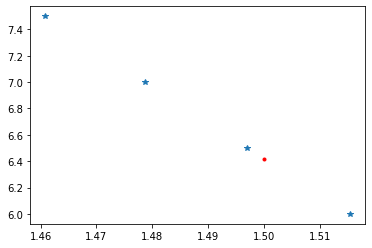

In [82]:
data = np.loadtxt('lakeshore.txt')

def lakeshore(V, data):
    '''
    Provides interpolated temperature given some input voltage. 

    Parameters: 
    -----------

    V: float
        Input voltage
    data: '.txt' file
        Textfile containing information about the diodes. First column
        corresponds to temperature, second column corresponding voltage
        and third column dV/dT. 

    Returns: float
        Interpolated temperature
    '''


    T_raw, V_raw, dVdT = np.loadtxt('lakeshore.txt').T

    
    #We will utilize the NearestNeighbors package from sklearn in order
    #to determine the nearest neighbors of the input voltage. See attached PDF
    #for a description of the package
    

    V_temp = V_raw.reshape(-1,1)
    V_neighbors = np.vstack((V, V_temp)) #Add input voltage to raw voltages

    nbrs = NearestNeighbors(n_neighbors=5, algorithm = 'ball_tree').fit(V_neighbors)
    distances, indices = nbrs.kneighbors(V_neighbors)

    x_use = V_raw[indices[0][1:]]
    y_use = T_raw[indices[0][1:]]

    print(x_use, y_use)
    
    p = np.polyfit(x_use, y_use, 3)
    interpolated_temp = np.polyval(p, V)
    print(interpolated_temp)
    
    plt.plot(x_use, y_use, '*')
    plt.plot(V, interpolated_temp, '.', color = 'red')
    plt.show()
    



    return


lakeshore(1.5, data)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

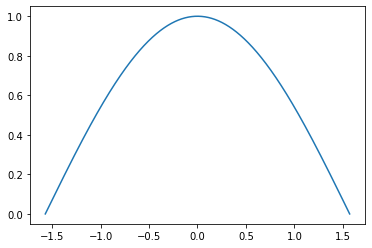

In [2]:
x = np.linspace(-np.pi/2, np.pi/2, 1001)
plt.plot(x, np.cos(x))